In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, cross_val_predict, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score

try:
    df = pd.read_csv("kc_house_data_NaN.csv")
except FileNotFoundError:
    print("Dataset file not found. Please ensure 'kc_house_data.csv' is in the same directory or adjust the path.")


In [9]:
# Task 1: Display the data types of each column
print("Data Types of each column:")
print(df.dtypes)

Data Types of each column:
Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


In [25]:
# Task 2: Drop columns "id" and "Unnamed: 0" and get statistical summary
print("DataFrame before dropping columns. Head:")
print(df.head())
print("\nDataFrame before dropping columns. Shape:", df.shape)

# Check if columns exist before dropping to avoid errors on re-run
cols_to_drop = ["id", "Unnamed: 0"]
existing_cols_to_drop = [col for col in cols_to_drop if col in df.columns]

if existing_cols_to_drop:
    df.drop(existing_cols_to_drop, axis=1, inplace=True)
    print("\nColumns dropped successfully.")
else:
    print("\nColumns 'id' and 'Unnamed: 0' not found or already dropped.")

print("\nStatistical summary after dropping columns:")
print(df.describe())

DataFrame before dropping columns. Head:
              date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  20141013T000000  221900.0       3.0       1.00         1180      5650   
1  20141209T000000  538000.0       3.0       2.25         2570      7242   
2  20150225T000000  180000.0       2.0       1.00          770     10000   
3  20141209T000000  604000.0       4.0       3.00         1960      5000   
4  20150218T000000  510000.0       3.0       2.00         1680      8080   

   floors  waterfront  view  condition  grade  sqft_above  sqft_basement  \
0     1.0           0     0          3      7        1180              0   
1     2.0           0     0          3      7        2170            400   
2     1.0           0     0          3      6         770              0   
3     1.0           0     0          5      7        1050            910   
4     1.0           0     0          3      8        1680              0   

   yr_built  yr_renovated  zipcode      lat  

In [11]:
# Task 3: Count the number of houses with unique floor values and convert to a DataFrame
print("Value counts for 'floors' attribute:")
floor_counts = df['floors'].value_counts()
floor_counts_df = floor_counts.to_frame()
print(floor_counts_df)

Value counts for 'floors' attribute:
        count
floors       
1.0     10680
2.0      8241
1.5      1910
3.0       613
2.5       161
3.5         8


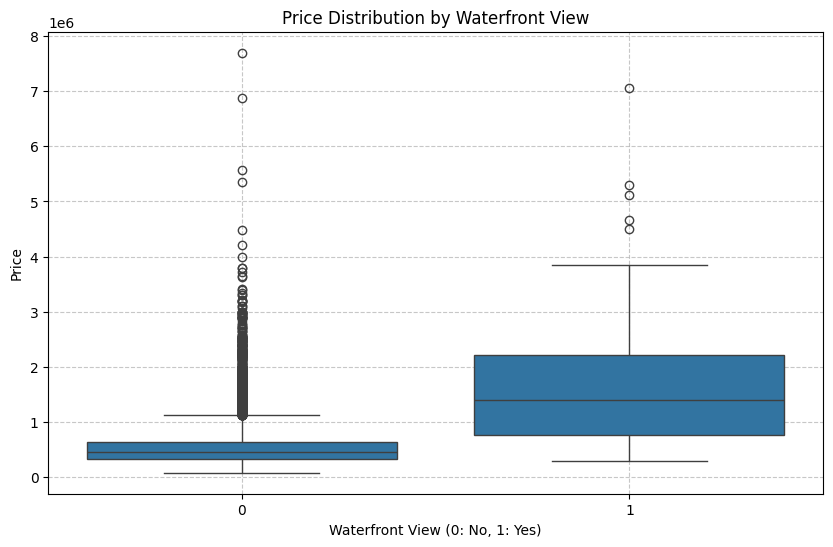

In [12]:
# Task 4: Boxplot to determine price outliers for houses with/without waterfront view
plt.figure(figsize=(10, 6))
sns.boxplot(x='waterfront', y='price', data=df)
plt.title('Price Distribution by Waterfront View')
plt.xlabel('Waterfront View (0: No, 1: Yes)')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

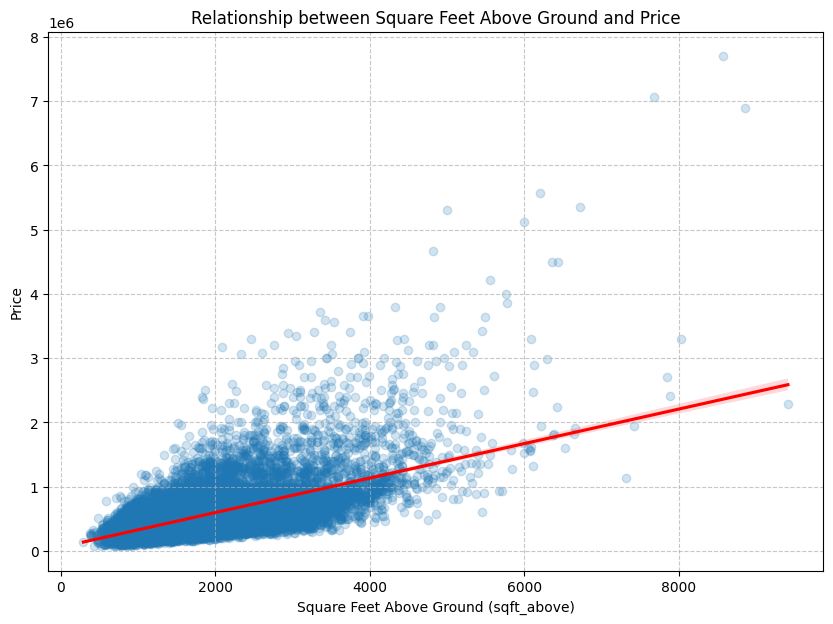

In [13]:
# Task 5: Regplot to determine correlation between sqft_above and price
plt.figure(figsize=(10, 7))
sns.regplot(x='sqft_above', y='price', data=df, scatter_kws={'alpha':0.2}, line_kws={'color': 'red'})
plt.title('Relationship between Square Feet Above Ground and Price')
plt.xlabel('Square Feet Above Ground (sqft_above)')
plt.ylabel('Price')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [14]:
# Task 6: Fit a linear regression model to predict price using 'sqft_living' and calculate R^2
X_sqft_living = df[['sqft_living']]
y = df['price']

lm_sqft_living = LinearRegression()
lm_sqft_living.fit(X_sqft_living, y)

yhat_sqft_living = lm_sqft_living.predict(X_sqft_living)
r2_sqft_living = r2_score(y, yhat_sqft_living)

print(f"R^2 for Linear Regression with 'sqft_living': {r2_sqft_living}")

R^2 for Linear Regression with 'sqft_living': 0.4928532179037931


In [17]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Assuming df is already loaded and columns are dropped from previous steps

# Define the list of features
features = [
    "floors", "waterfront", "lat", "bedrooms", "sqft_basement",
    "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"
]

# Create feature set X and target y
X_multi = df[features].copy() # Use .copy() to avoid SettingWithCopyWarning
y = df['price']

# --- IMPUTATION STEP ---
# Initialize the imputer to fill missing values with the mean of the column
imputer = SimpleImputer(strategy='mean')

# Fit the imputer on X_multi and transform it
# This will replace NaNs in X_multi with the mean of their respective columns
X_multi_imputed = pd.DataFrame(imputer.fit_transform(X_multi), columns=X_multi.columns)

# Verify if NaNs are gone (optional, but good for debugging)
# print("NaNs after imputation:\n", X_multi_imputed.isnull().sum())
# -----------------------

lm_multi = LinearRegression()
lm_multi.fit(X_multi_imputed, y) # Use the imputed data here

yhat_multi = lm_multi.predict(X_multi_imputed) # Predict using imputed data as well
r2_multi_features = r2_score(y, yhat_multi)

print(f"R^2 for Linear Regression with multiple features (after imputation): {r2_multi_features}")

R^2 for Linear Regression with multiple features (after imputation): 0.6576951666037499


In [19]:
# Modified Pipeline for Task 8 to include Imputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer # Import SimpleImputer
from sklearn.metrics import r2_score

# ... (define features, X_pipe, y as before) ...

Input = [
    ('imputer', SimpleImputer(strategy='mean')), # Add imputer as the first step
    ('scale', StandardScaler()),
    ('polynomial', PolynomialFeatures(degree=2, include_bias=False)),
    ('model', LinearRegression())
]
pipe = Pipeline(Input)

# Fit the pipeline (it will handle imputation internally now)
pipe.fit(X_pipe, y)

# Predict prices
yhat_pipe = pipe.predict(X_pipe)

# Calculate R^2
r2_pipeline = r2_score(y, yhat_pipe)

print(f"R^2 for Pipeline model (Imputer, StandardScaler, PolyFeatures degree=2, LinearRegression): {r2_pipeline}")

R^2 for Pipeline model (Imputer, StandardScaler, PolyFeatures degree=2, LinearRegression): 0.7513408515988733


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Assuming df is already loaded and columns are dropped

# Define the list of features
features = ["floors", "waterfront", "lat", "bedrooms", "sqft_basement",
            "view", "bathrooms", "sqft_living15", "sqft_above", "grade", "sqft_living"]

# Create feature set X and target y
X_ridge = df[features].copy() # Use .copy()
y = df['price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_ridge, y, test_size=0.2, random_state=42) # Using random_state for reproducibility

# --- IMPUTATION STEP FOR TRAIN AND TEST SETS ---
# Initialize the imputer
imputer = SimpleImputer(strategy='mean')

# Fit imputer on X_train and transform X_train
X_train_imputed = imputer.fit_transform(X_train)

# Transform X_test using the imputer fitted on X_train (DO NOT refit on test data)
X_test_imputed = imputer.transform(X_test)
# ------------------------------------------------

# Create and fit a Ridge regression object using the IMPUTED training data
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_imputed, y_train) # Use X_train_imputed here

# Predict on the IMPUTED test data
yhat_test_ridge = ridge_model.predict(X_test_imputed) # Use X_test_imputed here

# Calculate R^2 using the test data
r2_ridge = r2_score(y_test, yhat_test_ridge)

print(f"R^2 for Ridge regression (alpha=0.1) on test data: {r2_ridge}")

R^2 for Ridge regression (alpha=0.1) on test data: 0.6613984284660122


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Assuming df is already loaded and columns are dropped

# Define the list of features
features = [
    "floors",
    "waterfront",
    "lat",
    "bedrooms",
    "sqft_basement",
    "view",
    "bathrooms",
    "sqft_living15",
    "sqft_above",
    "grade",
    "sqft_living",
]

# Create feature set X and target y for Task 10
X_task10 = df[features].copy()  # Use .copy() to avoid SettingWithCopyWarning
y_task10 = df["price"]

# Split data into training and testing sets
X_train_task10, X_test_task10, y_train_task10, y_test_task10 = train_test_split(
    X_task10, y_task10, test_size=0.2, random_state=42
)

# --- 1. IMPUTATION STEP (BEFORE POLYNOMIAL FEATURES) ---
# Initialize the imputer
imputer_task10 = SimpleImputer(strategy="mean")

# Fit imputer on X_train and transform X_train
X_train_imputed_task10 = imputer_task10.fit_transform(X_train_task10)

# Transform X_test using the imputer fitted on X_train (DO NOT refit on test data)
X_test_imputed_task10 = imputer_task10.transform(X_test_task10)
# ----------------------------------------------------

# --- 2. POLYNOMIAL FEATURE TRANSFORMATION (AFTER IMPUTATION) ---
# Perform a second-order polynomial transform on the IMPUTED data
poly_transformer_2nd_task10 = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly_2nd_task10 = poly_transformer_2nd_task10.fit_transform(
    X_train_imputed_task10
)  # Use imputed data
X_test_poly_2nd_task10 = poly_transformer_2nd_task10.transform(
    X_test_imputed_task10
)  # Use imputed data
# -------------------------------------------------------------

# --- 3. RIDGE REGRESSION (AFTER IMPUTATION AND POLYNOMIAL TRANSFORMATION) ---
# Create and fit a Ridge regression object using the transformed and imputed training data
ridge_poly_model_2nd_task10 = Ridge(alpha=0.1)
ridge_poly_model_2nd_task10.fit(X_train_poly_2nd_task10, y_train_task10)

# Calculate R^2 utilizing the transformed and imputed test data
yhat_test_poly_ridge_2nd_task10 = ridge_poly_model_2nd_task10.predict(
    X_test_poly_2nd_task10
)
r2_poly_ridge_2nd_task10 = r2_score(
    y_test_task10, yhat_test_poly_ridge_2nd_task10
)

print(
    f"R^2 for 2nd-order Polynomial Ridge regression (alpha=0.1) on test data: {r2_poly_ridge_2nd_task10}"
)
# -------------------------------------------------------------------------

R^2 for 2nd-order Polynomial Ridge regression (alpha=0.1) on test data: 0.7000721272905382
